In [2]:
import os
import sys
import warnings

import numpy as np

import pandas as pd
import statsmodels.formula.api as smf
from IPython.core.display import HTML
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Data Cleaning 

In [3]:
df = pd.read_csv('vienna_raw_march.csv')
print(df.shape)   
df.head()  

(13790, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38768,https://www.airbnb.com/rooms/38768,20250305023444,2025-03-08,city scrape,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,the Karmeliterviertel became very popular in t...,https://a0.muscache.com/pictures/ad4089a3-5355...,166283,...,4.94,4.77,4.70,NaN,t,3,3,0,0,2.34
1,40625,https://www.airbnb.com/rooms/40625,20250305023444,2025-03-05,city scrape,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,175131,...,4.94,4.61,4.72,NaN,f,14,13,1,0,1.24
2,51287,https://www.airbnb.com/rooms/51287,20250305023444,2025-03-08,city scrape,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,The neighbourhood has a lot of very nice littl...,https://a0.muscache.com/pictures/25163038/1c4e...,166283,...,4.95,4.87,4.59,NaN,t,3,3,0,0,2.22
3,109679,https://www.airbnb.com/rooms/109679,20250305023444,2025-03-07,city scrape,Near Palace Schönbrunn - Apt. 4,Studio apartment for 4 persons:<br />- Bunk be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/1982234/1fc34...,175131,...,4.91,4.65,4.82,NaN,f,14,13,1,0,0.91
4,114505,https://www.airbnb.com/rooms/114505,20250305023444,2025-03-05,city scrape,"Near Palace Schönbrunn, Apt. 5",Studio apartment for 4 persons:<br />- Bunk be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11536257/9065...,175131,...,4.96,4.71,4.80,NaN,f,14,13,1,0,0.74


In [4]:
df = df.drop(columns=["id", "listing_url", "scrape_id", "last_scraped", "picture_url",
                      "host_picture_url", "host_url", "host_name", "calendar_last_scraped", "host_thumbnail_url"])
print(df.shape)      


(13790, 69)


In [5]:
# Drop rows where 'price' is NaN
df = df.dropna(subset=['price'])
print(df.shape)

(9821, 69)


In [6]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


calendar_updated                9821
neighbourhood_group_cleansed    9821
license                         9821
host_neighbourhood              6534
host_about                      5035
neighborhood_overview           4819
neighbourhood                   4819
host_location                   2765
reviews_per_month               1644
review_scores_value             1644
first_review                    1644
review_scores_accuracy          1644
review_scores_checkin           1644
review_scores_cleanliness       1644
review_scores_rating            1644
last_review                     1644
review_scores_location          1644
review_scores_communication     1644
host_response_rate               903
host_response_time               903
host_acceptance_rate             593
description                      241
host_is_superhost                203
has_availability                  28
beds                              13
bedrooms                           6
host_total_listings_count          4
h

In [7]:
df = df.drop(columns=["calendar_updated", "neighbourhood_group_cleansed", "license","host_neighbourhood", "host_about", 
                      "neighborhood_overview", "neighbourhood", "host_location"])
print(df.shape)      


(9821, 61)


In [8]:
df["price"] = (
    df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
)


In [9]:
df["price"].describe()

count     9821.000000
mean       124.060992
std        440.491994
min         13.000000
25%         57.000000
50%         80.000000
75%        116.000000
max      15210.000000
Name: price, dtype: float64

In [10]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


reviews_per_month              1644
review_scores_value            1644
review_scores_rating           1644
review_scores_accuracy         1644
review_scores_cleanliness      1644
review_scores_checkin          1644
review_scores_communication    1644
review_scores_location         1644
last_review                    1644
first_review                   1644
host_response_time              903
host_response_rate              903
host_acceptance_rate            593
description                     241
host_is_superhost               203
has_availability                 28
beds                             13
bedrooms                          6
host_has_profile_pic              4
host_verifications                4
host_total_listings_count         4
host_listings_count               4
host_since                        4
host_identity_verified            4
bathrooms                         2
bathrooms_text                    2
dtype: int64

In [11]:
cols_with_missing = [
    "has_availability",
    "beds",
    "bedrooms",
    "host_has_profile_pic",
    "host_verifications",
    "host_total_listings_count",
    "host_listings_count",
    "host_since",
    "host_identity_verified",
    "bathrooms",
    "bathrooms_text"
]

df = df.dropna(subset=cols_with_missing)
print(df.shape) 

(9768, 61)


In [12]:
# Handle missing values in review and host features
# 1. Reviews - create flag FIRST
df['has_reviews'] = df['review_scores_rating'].notna().astype(int)

# 2. Fill review scores with median OF EXISTING REVIEWS
review_cols = ['review_scores_rating', 'review_scores_accuracy', 
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 
               'review_scores_value']

for col in review_cols:
    median_score = df[df[col].notna()][col].median()
    df[col] = df[col].fillna(median_score)

# 3. Reviews per month = 0 for no reviews
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 4. Host features - median
df["host_response_rate"] = (
    df["host_response_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)

df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df["host_acceptance_rate"] = (
    df["host_acceptance_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [13]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


last_review           1606
first_review          1606
host_response_time     883
description            228
host_is_superhost      203
dtype: int64

In [14]:
df["host_response_time"].value_counts(dropna=False)


host_response_time
within an hour        7070
NaN                    883
within a few hours     812
within a day           797
a few days or more     206
Name: count, dtype: int64

In [15]:
host_response_dummies = pd.get_dummies(
    df["host_response_time"],
    prefix="host_response_time"
)

df = pd.concat([df, host_response_dummies], axis=1)
for col in host_response_dummies.columns:
    df[col] = df[col].astype(int)


In [16]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)


In [17]:
df["host_is_superhost"] = df["host_is_superhost"].fillna("f")
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})


In [18]:
df["first_review"] = pd.to_datetime(df["first_review"], errors="coerce")
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


In [19]:
reference_date = df["last_review"].max()


In [20]:
df["days_since_first_review"] = (reference_date - df["first_review"]).dt.days
df["days_since_last_review"] = (reference_date - df["last_review"]).dt.days


In [21]:
max_days = df["days_since_first_review"].max()

df["days_since_first_review"] = df["days_since_first_review"].fillna(max_days + 1)
df["days_since_last_review"] = df["days_since_last_review"].fillna(max_days + 1)

In [22]:
df = df.drop(columns=["first_review", "last_review"])
df.head() 


,source,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,host_response_time_a_few_days_plus,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,days_since_first_review,days_since_last_review
0,city scrape,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283,2010-07-14,within an hour,100.0,100.0,1,3.0,...,0,0,2.34,1,0,0,0,1,5098.0,61.0
1,city scrape,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131,2010-07-20,within a few hours,100.0,93.0,1,15.0,...,1,0,1.24,1,0,0,1,0,5329.0,50.0
2,city scrape,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283,2010-07-14,within an hour,100.0,100.0,1,3.0,...,0,0,2.22,1,0,0,0,1,5153.0,126.0
3,city scrape,Near Palace Schönbrunn - Apt. 4,Studio apartment for 4 persons:<br />- Bunk be...,175131,2010-07-20,within a few hours,100.0,93.0,1,15.0,...,1,0,0.91,1,0,0,1,0,4722.0,61.0
4,city scrape,"Near Palace Schönbrunn, Apt. 5",Studio apartment for 4 persons:<br />- Bunk be...,175131,2010-07-20,within a few hours,100.0,93.0,1,15.0,...,1,0,0.74,1,0,0,1,0,5022.0,798.0


## Features Extraction

In [23]:
# Amenity feature engineering
import unicodedata
import re

# 1) Clean and normalize the amenities column
#    - Convert to string
#    - Normalize unicode (e.g. \u2019 → ')
#    - Lowercase everything
#    - Remove brackets and quotes
#    - Replace separators with spaces
df["amenities_clean"] = (
    df["amenities"]
        .fillna("")
        .astype(str)
        .apply(lambda x: unicodedata.normalize("NFKD", x))
        .str.lower()
        .str.replace(r"[\[\]\{\}\"]", "", regex=True)  # remove brackets & quotes
        .str.replace(r"[_/]", " ", regex=True)        # normalize separators
)

# 2) Define robust regex patterns for amenities
#    - Patterns are flexible to wording variations
amenity_patterns = {
    "kitchen": r"\bkitchen\b",
    "hair_dryer": r"hair\s*dryer",
    "hot_water": r"hot\s*water",
    "wifi": r"wi[\s\-]?fi|internet|ethernet",
    "fast_wifi": r"fast\s*wi[\s\-]?fi",
    "iron": r"\biron\b",
    "heating": r"heating|radiant\s*heating|central\s*air",
    "washer": r"washer|washing\s*machine",
    "dryer": r"dryer",
    "refrigerator": r"refrigerator|fridge",
    "freezer": r"\bfreezer\b",
    "oven": r"\boven\b|baking\s*sheet",
    "stove": r"stove|cooktop|induction\s*stove",
    "microwave": r"microwave",
    "dishwasher": r"dishwasher",
    "coffee": r"coffee|coffee\s*maker|nespresso|espresso|pour[-\s]?over",
    "kettle": r"kettle",
    "tv": r"\btv\b|television|hdtv",
    "wine_glasses": r"wine\s*glasses?",
    "bathtub": r"bathtub|bath\s*tub",
    "shampoo": r"shampoo",
    "conditioner": r"conditioner",
    "soap": r"soap|shower\s*gel|body\s*soap",
    "cleaning_products": r"cleaning\s*products?",
    "first_aid_kit": r"first\s*aid",
    "smoke_alarm": r"smoke\s*alarm",
    "carbon_monoxide_alarm": r"carbon\s*monoxide",
    "fire_extinguisher": r"fire\s*extinguisher",
    "balcony": r"balcony",
    "workspace": r"workspace|desk",
    "books": r"books?|reading\s*material",
    "board_games": r"board\s*games?",
    "elevator": r"elevator|lift",
    "parking": r"parking",
    "self_checkin": r"self[\s\-]?check[\s\-]?in|lockbox",
    "pets_allowed": r"pets?\s*allowed",
    "security": r"security|safe",
    "dining_table": r"dining\s*table",
    "outdoor_dining": r"outdoor\s*dining",
    "toaster": r"toaster",
    "netflix": r"netflix",
}

# 3) Create amenity dummy variables
#    - 1 if amenity is present, 0 otherwise
for amenity, pattern in amenity_patterns.items():
    df[f"amenity_{amenity}"] = (
        df["amenities_clean"]
        .str.contains(pattern, regex=True)
        .astype(int)
    )

# 4) (Optional but useful) Overall amenity richness score
amenity_cols = [c for c in df.columns if c.startswith("amenity_")]
df["amenities_score"] = df[amenity_cols].sum(axis=1)


In [24]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['days_since_hosting'] = (reference_date - df['host_since']).dt.days

In [25]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].map({"t": 1, "f": 0})
df["host_identity_verified"] = df["host_identity_verified"].map({"t": 1, "f": 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})


In [26]:
categorical_cols = [
    "room_type",
    "property_type",
    "neighbourhood_cleansed",
    "host_verifications"
]

for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1) 


In [27]:
VIENNA_CENTER_LAT = 48.208174
VIENNA_CENTER_LON = 16.373819
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c
df['distance_to_center'] = haversine(
    df['latitude'], df['longitude'], VIENNA_CENTER_LAT, VIENNA_CENTER_LON
)

In [28]:
# Drop price outliers
df = df[df['price'] <= 1000]

In [29]:
df.columns = df.columns.str.replace("/", "", regex=False)

In [30]:
df.columns = (
    df.columns
      .str.normalize("NFKD")          # normalize unicode
      .str.encode("ascii", "ignore")  # drop non-ascii chars
      .str.decode("utf-8")
      .str.replace(r"[^0-9a-zA-Z_]", "_", regex=True)
)

## Data Visualization

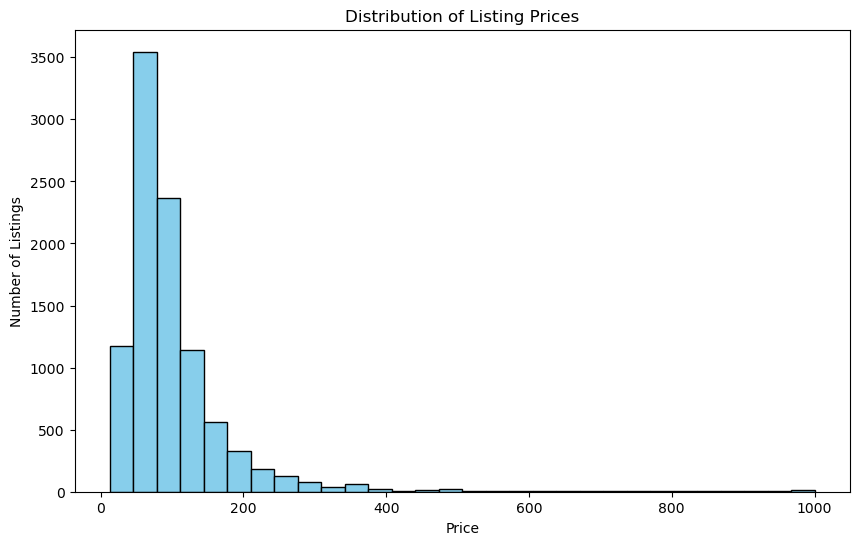

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

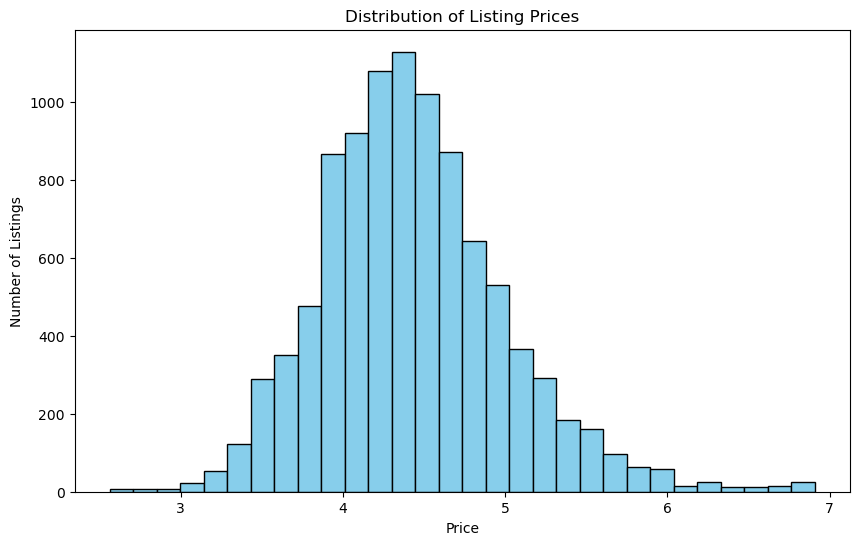

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df["price"]), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Price Distribution by Room Type')

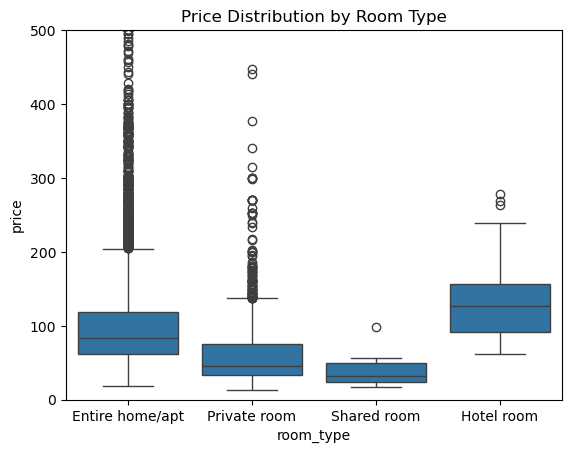

In [33]:
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")

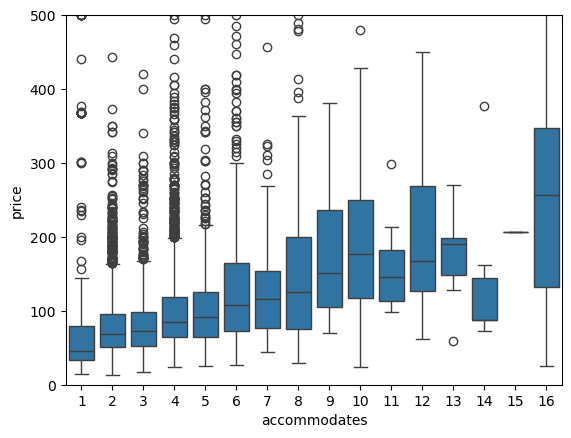

In [34]:
sns.boxplot(data = df, x = 'accommodates', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

Text(0.5, 1.0, 'Number of Listings by Neighborhood')

c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dcccddtcccccccc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 154 (\x9a)

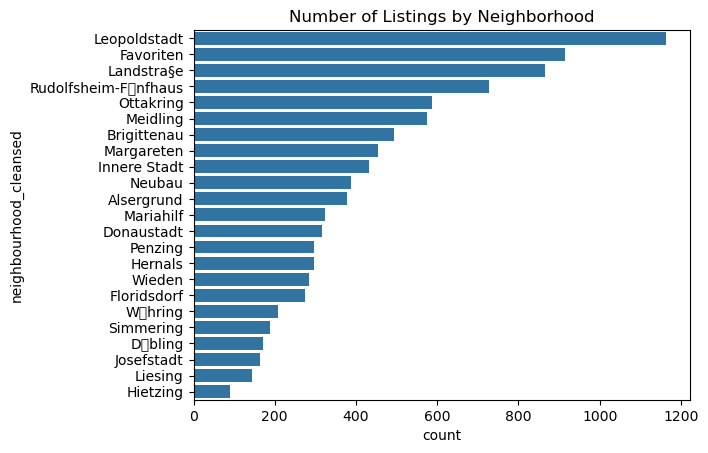

In [35]:
sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index)
plt.title("Number of Listings by Neighborhood")

Text(0.5, 1.0, 'Host Response Time Distribution')

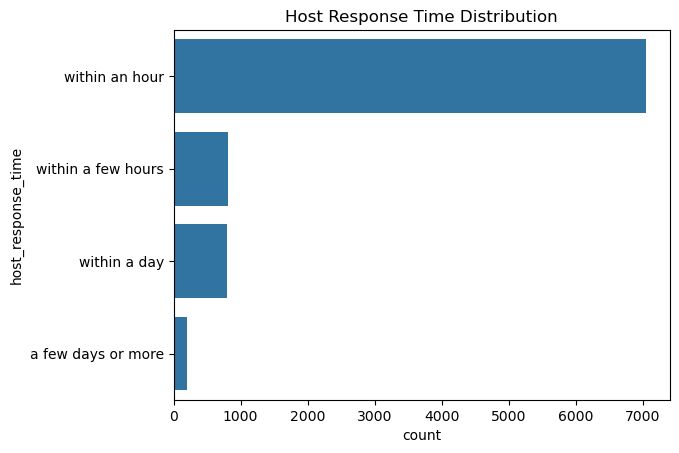

In [36]:
sns.countplot(y='host_response_time', data=df, order=df['host_response_time'].value_counts().index)
plt.title("Host Response Time Distribution")

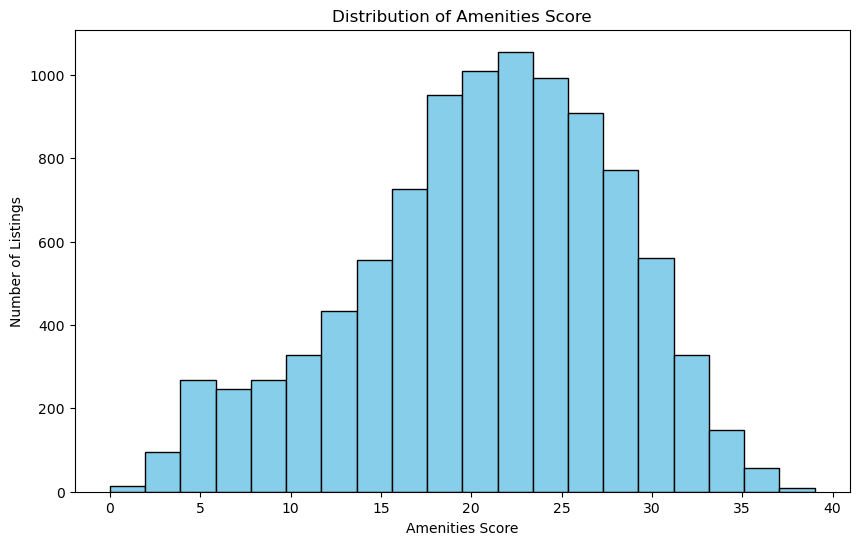

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df["amenities_score"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Amenities Score")
plt.xlabel("Amenities Score")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Host Verifications')

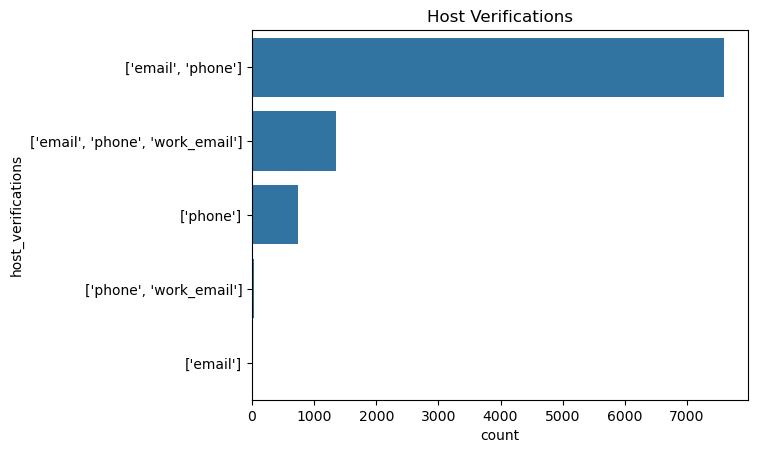

In [38]:
sns.countplot(y='host_verifications', data=df, order=df['host_verifications'].value_counts().index)
plt.title("Host Verifications")

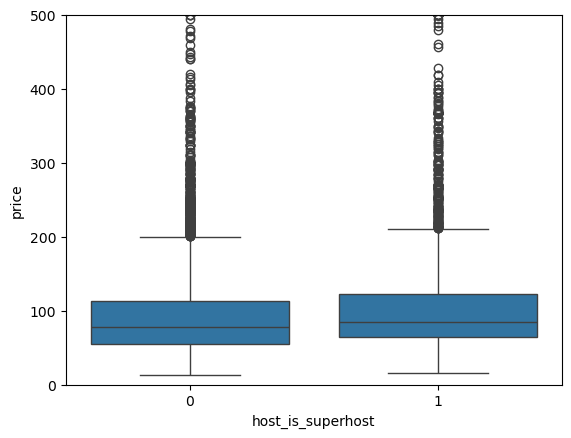

In [39]:
sns.boxplot(data = df, x = 'host_is_superhost', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

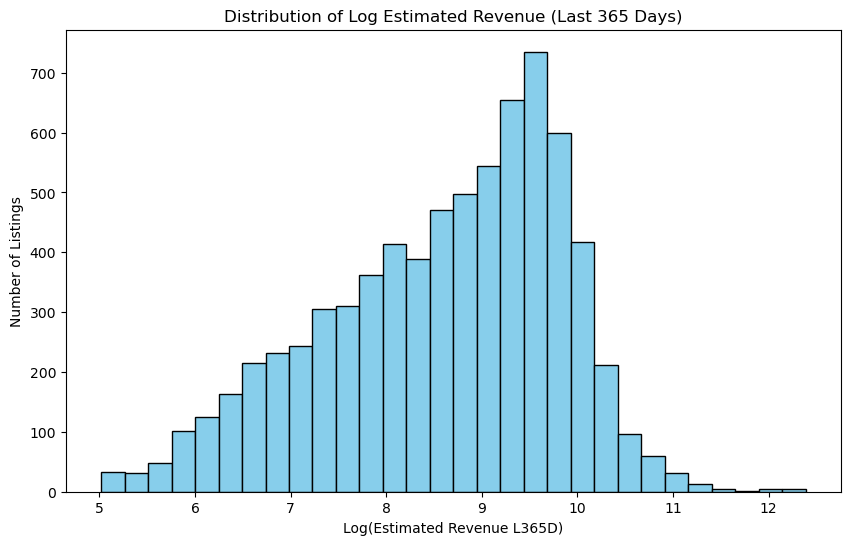

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(
    np.log1p(df.loc[df["estimated_revenue_l365d"] > 0, "estimated_revenue_l365d"]),
    bins=30,
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribution of Log Estimated Revenue (Last 365 Days)")
plt.xlabel("Log(Estimated Revenue L365D)")
plt.ylabel("Number of Listings")
plt.show()


In [41]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)
df.to_csv("vienna_cleaned_march.csv", index=False)
